In [35]:
# Imports
import numpy as np
import numpy.linalg as nplin
import numpy.random as npran
import scipy as sp
import scipy.linalg as splin
import scipy.stats as spstat
import matplotlib.pyplot as plt
import inspect
import knockoffGLM as ko
from __future__ import division
from sklearn import linear_model as lm

# show pyplots in the notebook
%matplotlib inline

# logit/invlogit
def logit(p):
    return np.log(p) - np.log(1 - p)

def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))

0.56 of null knockoffs came in first; 0.00 of variables never entered; 0.03 had ties


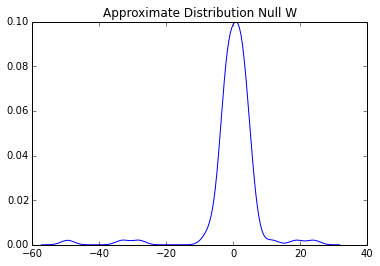

In [25]:
# simple example where all null vars are normal
n,p = 1000,100
y = npran.binomial(1,.2,n)
X_null = npran.randn(n,p)
ko.analyze_knockoff(None,X_null,y)

0.52 of null knockoffs came in first; 0.00 of variables never entered; 0.01 had ties


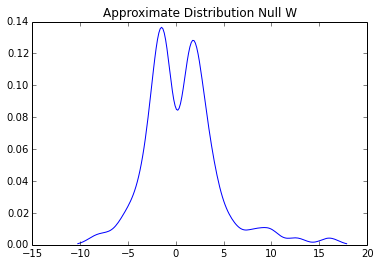

In [55]:
# repeat: simple example where all null vars are normal
n,p = 1000,100
y = npran.binomial(1,.2,n)
X_null = npran.randn(n,p)
ko.analyze_knockoff(None,X_null,y)

0.61 of null knockoffs came in first; 0.00 of variables never entered; 0.00 had ties


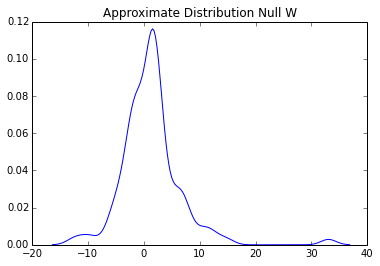

In [26]:
# now, the nulls will all be sparse binomial
n,p = 1000,100
X = npran.binomial(1,.2,(n,p))
y = npran.binomial(1,.2,n)
ko.analyze_knockoff(None,X_null,y)

0.53 of null knockoffs came in first; 0.00 of variables never entered; 0.02 had ties


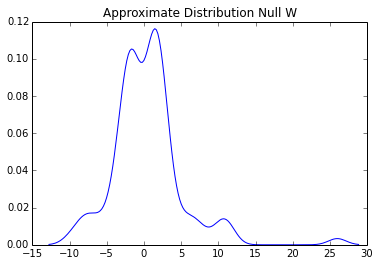

In [27]:
# now, X null but sparse normal
n,p = 1000,100
X = npran.binomial(1,.2,(n,p)) * npran.randn(n,p)
y = npran.binomial(1,.2,n)
ko.analyze_knockoff(None,X_null,y)

0.52 of null knockoffs came in first; 0.00 of variables never entered; 0.01 had ties


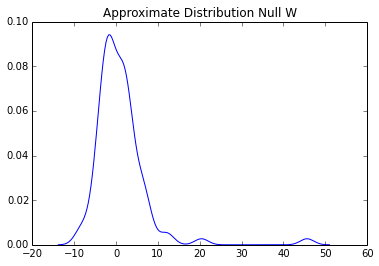

In [53]:
# Introduce some non-null X, all still sparse. Coefficient random normal
n,p0,p1 = 1000,90,10
X_null = npran.binomial(1,.2,(n,p0))
X_1    = npran.binomial(1,.2,(n,p1))
beta   = npran.randn(10)
eta    = np.dot(X_1,beta)
y      = npran.binomial(1,inv_logit(eta),n)
ko.analyze_knockoff(X_1,X_null,y)

0.59 of null knockoffs came in first; 0.00 of variables never entered; 0.01 had ties


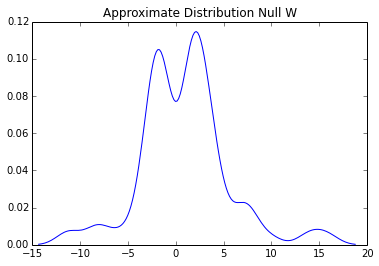

In [52]:
# as before, sparse normal X 
n,p0,p1 = 1000,90,10
X_null = npran.binomial(1,.2,(n,p0)) * npran.randn(n,p0)
X_1    = npran.binomial(1,.2,(n,p1)) * npran.randn(n,p1)
beta   = npran.randn(10)
eta    = np.dot(X_1,beta)
y      = npran.binomial(1,inv_logit(eta),n)
ko.analyze_knockoff(X_1,X_null,y)

0.56 of null knockoffs came in first; 0.00 of variables never entered; 0.01 had ties


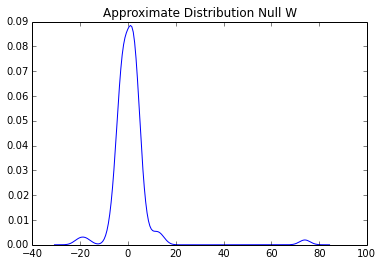

In [54]:
# Introduce some non-null X, all still sparse. Coefficient random normal
n,p0,p1 = 1000,90,10
X_null = npran.binomial(1,.2,(n,p0)) * npran.randn(n,p0)
X_1    = npran.binomial(1,.2,(n,p1)) * npran.randn(n,p1)
beta   = npran.randn(10)
eta    = np.dot(X_1,beta)
y      = npran.binomial(1,inv_logit(eta),n)
ko.analyze_knockoff(X_1,X_null,y)